In [339]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import re

In [340]:
# Grab and process the raw data.
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
             "master/sms_spam_collection/SMSSpamCollection"
            )
sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw.columns = ['spam', 'message']

In [341]:
sms_raw.head()

,spam,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [342]:
keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent', 'request']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [343]:
sms_raw['allcaps'] = sms_raw.message.str.isupper()

I often see subjects like these in my personal spam folder--replies to "requests" I never made:

In [344]:
sms_raw.loc[sms_raw['message'].str.contains(' request ',case=False),['spam','message']]

,spam,message
7,ham,As per your request 'Melle Melle (Oru Minnamin...
103,ham,As per your request 'Melle Melle (Oru Minnamin...
154,ham,As per your request 'Melle Melle (Oru Minnamin...
1729,ham,As per your request 'Maangalyam (Alaipayuthe)'...
2915,spam,Sorry! U can not unsubscribe yet. THE MOB offe...
3649,ham,As per your request 'Maangalyam (Alaipayuthe)'...
3696,ham,"Hello, As per request from &lt;#&gt; Rs.5 ha..."


In [345]:
sms_raw.loc[sms_raw['message'].str.contains(' you ',case=False)]

,spam,message,click,offer,winner,buy,free,cash,urgent,request,allcaps
5,spam,FreeMsg Hey there darling it's been 3 week's n...,False,False,False,False,False,False,False,False,False
8,spam,WINNER!! As a valued network customer you have...,False,False,False,False,False,False,False,False,False
12,spam,URGENT! You have won a 1 week FREE membership ...,False,False,False,False,True,False,False,False,False
13,ham,I've been searching for the right words to tha...,False,False,False,False,False,False,False,False,False
20,ham,Is that seriously how you spell his name?,False,False,False,False,False,False,False,False,False
24,ham,Ffffffffff. Alright no way I can meet up with ...,False,False,False,False,False,False,False,False,False
27,ham,Did you catch the bus ? Are you frying an egg ...,False,False,False,False,False,False,False,False,False
28,ham,"I'm back &amp; we're packing the car now, I'll...",False,False,False,False,False,False,False,False,False
30,ham,"Wait that's still not all that clear, were you...",False,False,False,False,False,False,False,False,False
33,ham,For fear of fainting with the of all that hous...,False,False,False,False,False,False,False,False,False


In [346]:
#sms_raw['hot_live'] = sms_raw['message'].str.contains('hot live',case=False)

In [347]:
sms_raw['spam'] = (sms_raw['spam'] == 'spam')
# Note that if you run this cell a second time everything will become false.
# So... Don't.

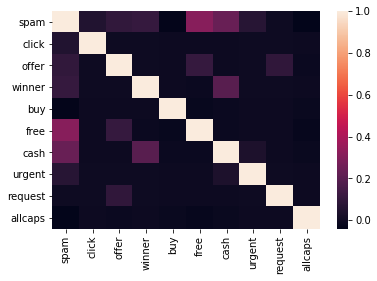

In [348]:
sns.heatmap(sms_raw.corr())

Before we actually run the model we have to build out our training data. SKLearn required you to specify an outcome (y or dependent variable) and your inputs (x or independent variables). We'll do that below under the titles data and target.

In [349]:
data = sms_raw[keywords + ['allcaps']] #+ ['per_request']]
target = sms_raw['spam']

In [350]:
data

,click,offer,winner,buy,free,cash,urgent,request,allcaps
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,True,False,False,False,False


In [351]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import GaussianNB  #MultinomialNB BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = GaussianNB() #MultinomialNB() #BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 5572 points : 610


In [352]:
# Add the classification from the model to a new column so we can browse the output
sms_raw['naive_bayes_spam'] = y_pred

In [353]:
# What's a mismatch between what we thought was spam, and what the model thinks is spam?
sms_raw.loc[(sms_raw['spam'] != sms_raw['naive_bayes_spam']),['spam','naive_bayes_spam','message']]

,spam,naive_bayes_spam,message
2,True,False,Free entry in 2 a wkly comp to win FA Cup fina...
5,True,False,FreeMsg Hey there darling it's been 3 week's n...
7,False,True,As per your request 'Melle Melle (Oru Minnamin...
8,True,False,WINNER!! As a valued network customer you have...
11,True,False,"SIX chances to win CASH! From 100 to 20,000 po..."
19,True,False,England v Macedonia - dont miss the goals/team...
34,True,False,Thanks for your subscription to Ringtone UK yo...
54,True,False,SMS. ac Sptv: The New Jersey Devils and the De...
56,True,False,Congrats! 1 year special cinema pass for 2 is ...
65,True,False,"As a valued customer, I am pleased to advise y..."


### Bayesian poisoning

Look at some spam messages that your model correctly identified and see if you can reword or rework them to get them classified as ham.

In [354]:
sms_raw.loc[(sms_raw['naive_bayes_spam'] == True) & (sms_raw['spam'] == False)]

,spam,message,click,offer,winner,buy,free,cash,urgent,request,allcaps,naive_bayes_spam
7,False,As per your request 'Melle Melle (Oru Minnamin...,False,False,False,False,False,False,False,True,False,True
87,False,Yes I started to send requests to make it but ...,False,False,False,False,False,True,False,False,False,True
103,False,As per your request 'Melle Melle (Oru Minnamin...,False,False,False,False,False,False,False,True,False,True
154,False,As per your request 'Melle Melle (Oru Minnamin...,False,False,False,False,False,False,False,True,False,True
172,False,"Hmmm.. Thk sure got time to hop ard... Ya, can...",False,False,False,False,True,False,False,False,False,True
178,False,Turns out my friends are staying for the whole...,False,False,False,False,True,False,False,False,False,True
180,False,Hi! You just spoke to MANEESHA V. We'd like to...,False,False,False,False,True,False,False,False,False,True
181,False,You lifted my hopes with the offer of money. I...,False,True,False,False,False,False,False,False,False,True
399,False,"Good evening Sir, Al Salam Wahleykkum.sharing ...",False,True,False,False,False,False,False,False,False,True
495,False,Are you free now?can i call now?,False,False,False,False,True,False,False,False,False,True


In [355]:
sms_raw.iloc[178]

spam                                                            False
message             Turns out my friends are staying for the whole...
click                                                           False
offer                                                           False
winner                                                          False
buy                                                             False
free                                                             True
cash                                                            False
urgent                                                          False
request                                                         False
allcaps                                                         False
naive_bayes_spam                                                 True
Name: 178, dtype: object

Okay this one is odd. Nothing from the keywords list is in this subject line, but the model decided it is spam:

`message             Turns out my friends are staying for the whole...`

`keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent', 'request']`

This one is more obvious, but I want to substitute 'available' for 'free' and see if that will cause this one to be reclassified:

In [356]:
sms_raw.iloc[495]

spam                                           False
message             Are you free now?can i call now?
click                                          False
offer                                          False
winner                                         False
buy                                            False
free                                            True
cash                                           False
urgent                                         False
request                                        False
allcaps                                        False
naive_bayes_spam                                True
Name: 495, dtype: object

I can create two new rows to append to the existing dataframe:

In [357]:
upd_sms = pd.DataFrame(columns=['spam','message'])
upd_sms = upd_sms.append({'spam': False, 
                'message': "As it turns out, my friends are staying for the whole week"},
               ignore_index=True)
upd_sms = upd_sms.append({'spam': False, 
                'message': "Are you available now? Can I call now?"},
               ignore_index=True)  
upd_sms.head()

,spam,message
0,False,"As it turns out, my friends are staying for th..."
1,False,Are you available now? Can I call now?


In [358]:
sms_upd = sms_raw.append(upd_sms,ignore_index=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Verifying that the new rows were appended properly:

In [359]:
# The two required fields are filled in but the keywords have not been assigned values. Let's fix that next.
sms_upd.tail()

,allcaps,buy,cash,click,free,message,naive_bayes_spam,offer,request,spam,urgent,winner
5569,False,False,False,False,False,"Pity, * was in mood for that. So...any other s...",False,False,False,False,False,False
5570,False,False,False,False,False,The guy did some bitching but I acted like i'd...,False,False,False,False,False,False
5571,False,False,False,False,False,Rofl. Its true to its name,False,False,False,False,False,False
5572,NaN,NaN,NaN,NaN,NaN,"As it turns out, my friends are staying for th...",NaN,NaN,NaN,False,NaN,NaN
5573,NaN,NaN,NaN,NaN,NaN,Are you available now? Can I call now?,NaN,NaN,NaN,False,NaN,NaN


Updating the keywords variables for our new entries:

In [360]:
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_upd[str(key)] = sms_upd.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
sms_upd['allcaps'] = sms_upd.message.str.isupper()

In [361]:
# All of the keyword variables should be updated now:
sms_upd.tail()

,allcaps,buy,cash,click,free,message,naive_bayes_spam,offer,request,spam,urgent,winner
5569,False,False,False,False,False,"Pity, * was in mood for that. So...any other s...",False,False,False,False,False,False
5570,False,False,False,False,False,The guy did some bitching but I acted like i'd...,False,False,False,False,False,False
5571,False,False,False,False,False,Rofl. Its true to its name,False,False,False,False,False,False
5572,False,False,False,False,False,"As it turns out, my friends are staying for th...",NaN,False,False,False,False,False
5573,False,False,False,False,False,Are you available now? Can I call now?,NaN,False,False,False,False,False


Providing training data for the model, and running the model as before:

In [362]:
data = sms_upd[keywords + ['allcaps']]
target = sms_upd['spam']

In [369]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import GaussianNB  #MultinomialNB #BernoulliNB

# Instantiate our model and store it in a new variable.
bnb2 = GaussianNB() #MultinomialNB() #BernoulliNB() 

# Fit our model to the data.
bnb2.fit(data, target.astype('bool'))

# Classify, storing the result in a new variable.
y_pred2 = bnb2.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred2).sum()
))

Number of mislabeled points out of a total 5574 points : 610


Adding the output from the model to the dataframe, to make them easier to review:

In [370]:
# Add the classification from the model to a new column so we can browse the output
sms_upd['naive_bayes_spam'] = y_pred2

In [372]:
# What's a mismatch between what we thought was spam, and what the model thinks is spam?
#sms_raw.loc[(sms_raw['spam'] != sms_raw['naive_bayes_spam']),['spam','naive_bayes_spam','message']]
sms_upd.tail()

,allcaps,buy,cash,click,free,message,naive_bayes_spam,offer,request,spam,urgent,winner
5569,False,False,False,False,False,"Pity, * was in mood for that. So...any other s...",False,False,False,False,False,False
5570,False,False,False,False,False,The guy did some bitching but I acted like i'd...,False,False,False,False,False,False
5571,False,False,False,False,False,Rofl. Its true to its name,False,False,False,False,False,False
5572,False,False,False,False,False,"As it turns out, my friends are staying for th...",False,False,False,False,False,False
5573,False,False,False,False,False,Are you available now? Can I call now?,False,False,False,False,False,False


Hey that worked! I was able to get the model to mark the messages in the last two rows as False/ham by slightly changing the wording.